# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units = "imperial"
base_url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={api_key}&units={units}&q="

In [5]:
city_names = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []


print("Beginning Data Retrieval")
print("-----------------------------")


rec = 1
rec_set = 1


for city in cities:
    response = requests.get(query_url + city).json()
    
    if response["cod"] == '404':
        print("City not found. Skipping...")
    else:
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f'Processing Record {rec} of Set {rec_set} | {city}')
        rec += 1
    if rec == 48:
        rec_set += 1
        rec = 1

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | aligudarz
Processing Record 2 of Set 1 | mao
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | conde
Processing Record 5 of Set 1 | sinnamary
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | fairbanks
Processing Record 8 of Set 1 | amiens
Processing Record 9 of Set 1 | mbandaka
Processing Record 10 of Set 1 | huangmei
Processing Record 11 of Set 1 | sao filipe
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | maragheh
Processing Record 14 of Set 1 | lasa
Processing Record 15 of Set 1 | moen
Processing Record 16 of Set 1 | namibe
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | menongue
City not found. Skipping...
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | barrow
Processi

Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | jeremie
Processing Record 47 of Set 4 | bonavista
Processing Record 1 of Set 5 | mehamn
Processing Record 2 of Set 5 | luanda
Processing Record 3 of Set 5 | vila franca do campo
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | kautokeino
Processing Record 6 of Set 5 | winchester
Processing Record 7 of Set 5 | altoona
Processing Record 8 of Set 5 | gazli
Processing Record 9 of Set 5 | kallaste
Processing Record 10 of Set 5 | elat
Processing Record 11 of Set 5 | bhuj
Processing Record 12 of Set 5 | kamaishi
Processing Record 13 of Set 5 | poum
Processing Record 14 of Set 5 | alice springs
Processing Record 15 of Set 5 | ryotsu
Processing Record 16 of Set 5 | olean
Processing Record 17 of Set 5 | libreville
Processing Record 18 of Set 5 | eenhana
Processing Record 19 of Set 5 | vila velha
Processing Record 20 of Set 5 | kahului
Processing Record 21 of Set 5 | hopelchen
Processing Record 22 of Set 5 

Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | lishu
City not found. Skipping...
Processing Record 42 of Set 8 | baiyin
Processing Record 43 of Set 8 | glendive
City not found. Skipping...
Processing Record 44 of Set 8 | ahipara
Processing Record 45 of Set 8 | grants
Processing Record 46 of Set 8 | kudahuvadhoo
Processing Record 47 of Set 8 | los llanos de aridane
Processing Record 1 of Set 9 | necochea
Processing Record 2 of Set 9 | nagaur
City not found. Skipping...
Processing Record 3 of Set 9 | ponta do sol
Processing Record 4 of Set 9 | port elizabeth
Processing Record 5 of Set 9 | saint anthony
Processing Record 6 of Set 9 | nouadhibou
Processing Record 7 of Set 9 | soure
Processing Record 8 of Set 9 | pochutla
Processing Record 9 of Set 9 | baglan
Processing Record 10 of Set 9 | walvis bay
Processing Record 11 of Set 9 | pointe michel
Processing Record 12 of Set 9 | letnyaya stavka
Processing Record 13 of Set 9 | laibin
Processing Record 14 of Set 9 | bira

City not found. Skipping...
Processing Record 35 of Set 12 | kaeo
Processing Record 36 of Set 12 | camacha
Processing Record 37 of Set 12 | haicheng
Processing Record 38 of Set 12 | mwingi
Processing Record 39 of Set 12 | timiryazevskiy
Processing Record 40 of Set 12 | payakumbuh
----------------------------
Data Retrieval Complete
----------------------------


In [16]:
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 100.63, 'lat': -0.23},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 77.02,
  'pressure': 1010.17,
  'humidity': 94,
  'temp_min': 77.02,
  'temp_max': 77.02,
  'sea_level': 1010.17,
  'grnd_level': 966.43},
 'wind': {'speed': 3.04, 'deg': 53.0029},
 'clouds': {'all': 68},
 'dt': 1551669355,
 'sys': {'message': 0.0046,
  'country': 'ID',
  'sunrise': 1551655551,
  'sunset': 1551699160},
 'id': 1631905,
 'name': 'Payakumbuh',
 'cod': 200}

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data= pd.DataFrame({"City": city_names,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed})
weather_data.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Latitude      557
Longitude     557
Max Temp      557
Wind Speed    557
dtype: int64

In [7]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Aligudarz,0,IR,1551667301,73,33.40,49.69,4.84,2.82
1,Mao,20,DO,1551667249,73,19.55,-71.08,78.01,13.87
2,Provideniya,92,RU,1551665571,93,64.42,-173.23,30.18,35.14
3,Conde,68,BR,1551667303,87,-11.81,-37.61,80.98,6.96
4,Sinnamary,92,GF,1551666135,95,5.38,-52.96,78.64,13.78


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

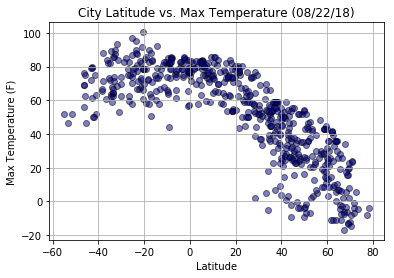

In [8]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker = 'o', facecolors='darkblue', edgecolors = 'black',
           alpha = 0.5)

plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

In [ ]:
#As latitude increases, Temperature decreases

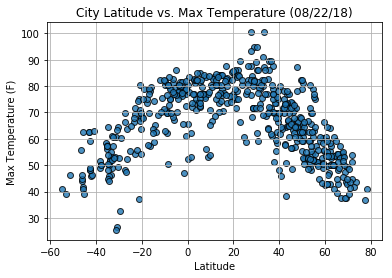

#### Latitude vs. Humidity Plot

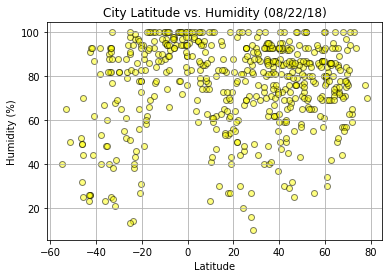

In [14]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker = 'o', facecolors='yellow', edgecolors = 'black',
           alpha = 0.5)

plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#### Latitude vs. Cloudiness Plot

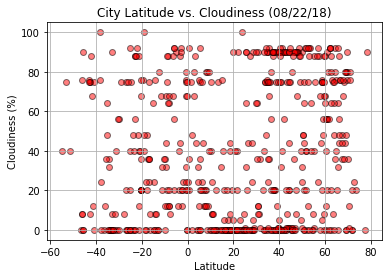

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker = 'o', facecolors='red', edgecolors = 'black',
           alpha = 0.5)

plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

In [ ]:
#This data is all over the place so you can't really predict a certain outcome

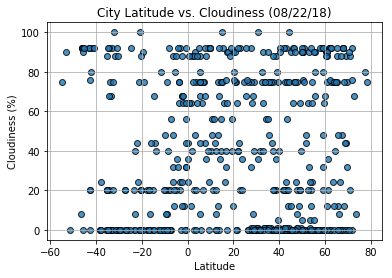

#### Latitude vs. Wind Speed Plot

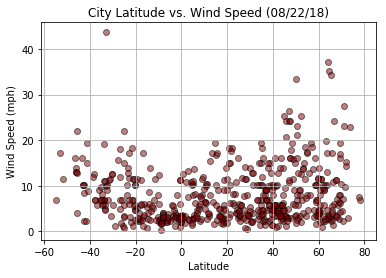

In [13]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker = 'o', facecolors='maroon', edgecolors = 'black',
           alpha = 0.5)

plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

In [ ]:
#Seems like no matter the latitude, wind speed tend to be low no matter what

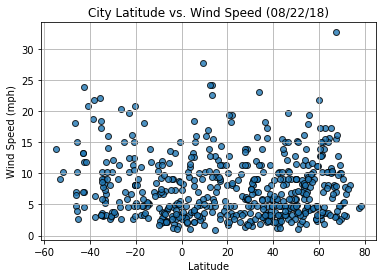